In [11]:
import os
from glob import glob
import json
from random import shuffle
from PIL import Image
from PIL import ImageDraw
import matplotlib.pyplot as plt
from PIL import ImageFont
import random
import numpy as np
from tqdm.autonotebook import tqdm 
import random 
from utils_datasets import get_font, get_samples

fonts = glob("fonts/**.ttf")
font_names = open("fonts/font_names.txt", 'r').read().splitlines()
font_colors = ["black"]
font_colors_ar = ["اسود"]

font_names_en = ['diwani decorated', 'diwani diacritized', 'diwani long', 'diwani standard',
                'kufi standard', 'kufi curved suqare', 'farisi standard', 'morrocan andulus',
                'rukaa bold', 'rukaa standard', 'rukaa fast', 'thuluth diwani', 'thuluth standard'
                ,'square standard', 'free bold', 'free standard', 'free long', 'mobili', 'managa'
                , 'aljazeera']

In [2]:
!rm -r data_100k_mulfont_64x64_en

In [12]:
max_words = 5000
W, H = (64, 64)

train_samples, valid_samples, test_samples = get_samples(max_words = max_words)
dataset = {'train': train_samples, 'valid': valid_samples, 'test': test_samples}

features = []
i = 0
path_to_data = f"data_100k_mulfont_{W}x{H}_en_white"
os.mkdir(path_to_data)
os.mkdir(f"{path_to_data}/valid")
os.mkdir(f"{path_to_data}/train")
os.mkdir(f"{path_to_data}/test")

In [13]:
capts = {}
pbar = tqdm(total=max_words*20)
for split in dataset:
    for _, word in enumerate(dataset[split]):
        for _, font_type in enumerate(fonts):
            w, h = (W, H)
            #choose background and resize
            bg = np.random.choice(glob('fonts-bgs/11.jpg'))
            img = Image.open(bg)
            img = img.resize((W, H))
            #choose a font color
            font_color = np.random.choice(font_colors)
            font_color_ar = font_colors_ar[font_colors.index(font_color)]
            #get font description
            ft_idx = int(font_type[6:-4]) - 1
            font_name = font_names[ft_idx]
            #insert space
            if random.random() < 0.01 and len(word) > 2:
                rnd_idx = random.randint(1, len(word) - 1)
                word = word[:rnd_idx] + ' ' + word[rnd_idx:]

            draw = ImageDraw.Draw(img)
            font, w, h, x, y = get_font(draw, word, font_type, width = W, height = H)
            if font is None:
                continue
            draw.text((x, y), word, (0, 0, 0), font)
            file_name = f"{word}_{i:05d}"
            img.save(f"{path_to_data}/{split}/{file_name}.png")
            capts[file_name] = font_names_en[ft_idx]
            open(f"{path_to_data}/{split}/{file_name}.txt", 'w').write(word)
            i += 1
            pbar.update(1) 

  0%|          | 0/100000 [00:00<?, ?it/s]

In [14]:
capts[list(capts.keys())[0]]
with open(f"{path_to_data}/capts.json", "w") as fp:
    json.dump(capts,fp) 

سعيه ا
farisi standard


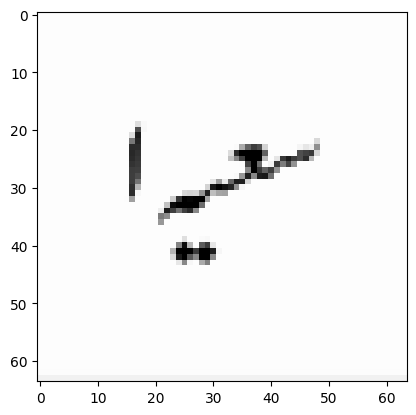

يأتي
diwani standard


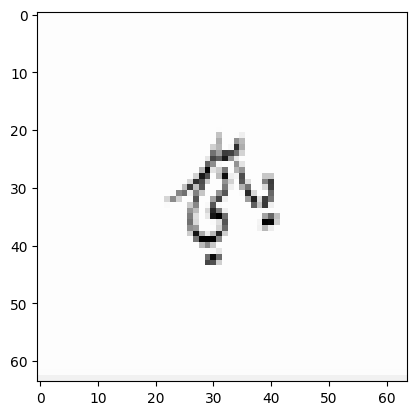

ومؤشر
diwani decorated


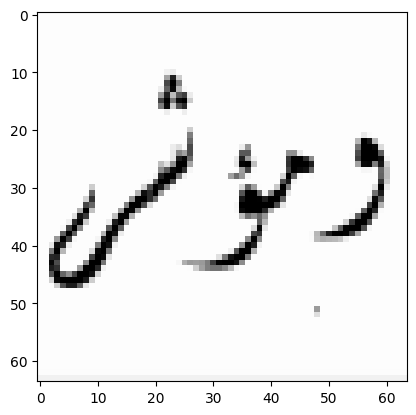

وسط
rukaa standard


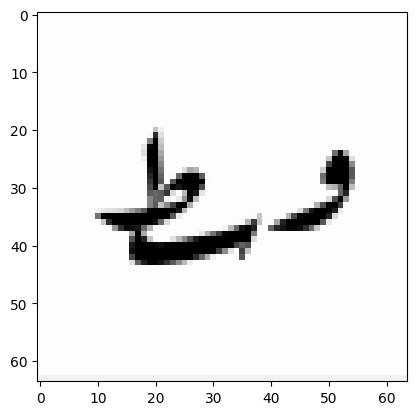

المسجد
thuluth diwani


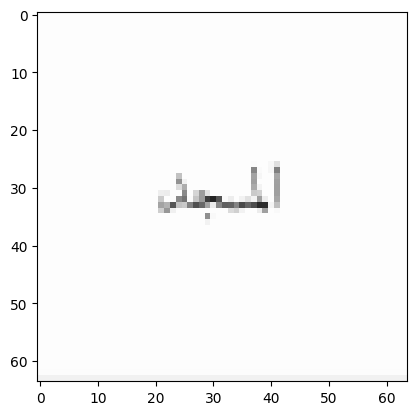

عنف
diwani standard


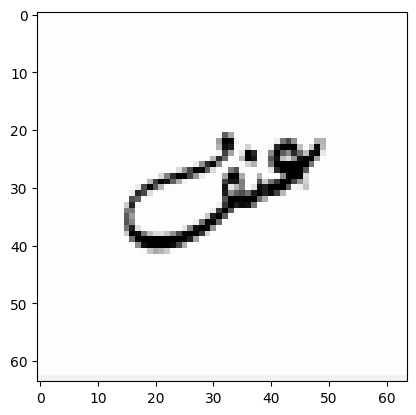

الاستشارية
morrocan andulus


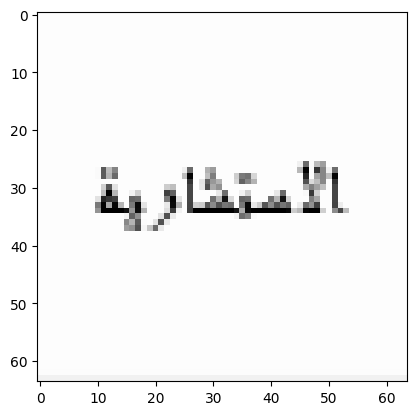

الكعبي
rukaa standard


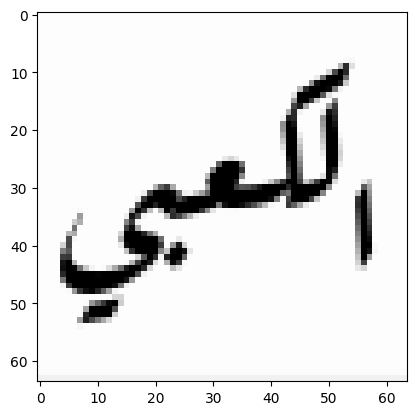

وبريطانيا
diwani standard


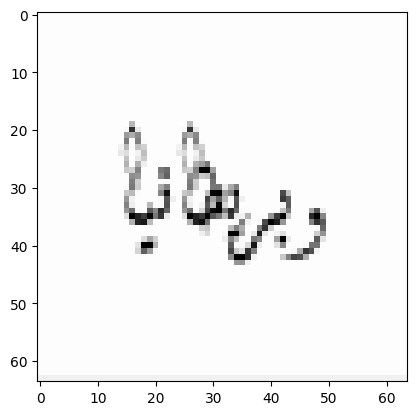

السهم
rukaa fast


In [ ]:
base_path = f"{path_to_data}/train"
for i, img_name in enumerate(os.listdir(base_path)):
    key, _ = img_name.split('.')    
    if img_name.endswith(".png"):
        txt = open(f"{base_path}/{img_name[:-4]}.txt", "r").read()
        capt = capts.get(key)
        print(txt)
        print(capt)
        im = Image.open(f"{base_path}/{img_name}")
        plt.imshow(im)
        plt.show()
        if i > 50:
            break

عرقه
rukaa fast


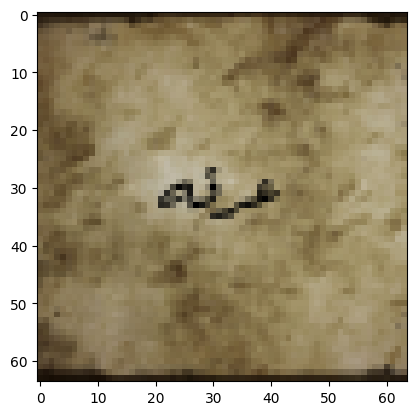

وهذ ا
mobili


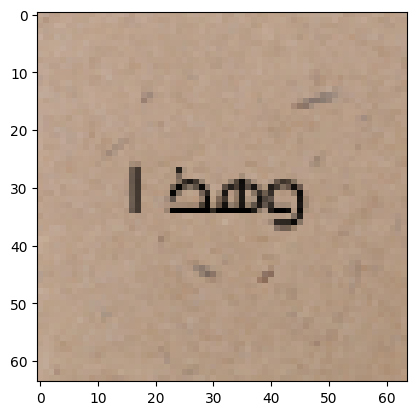

ومحمية
diwani decorated


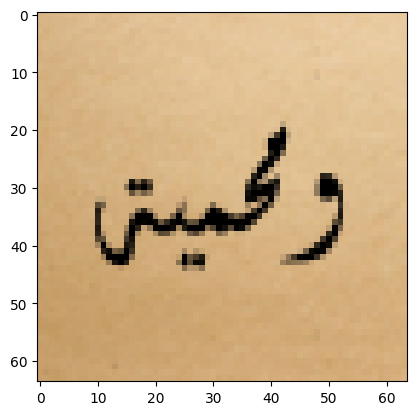

أستراليا
aljazeera


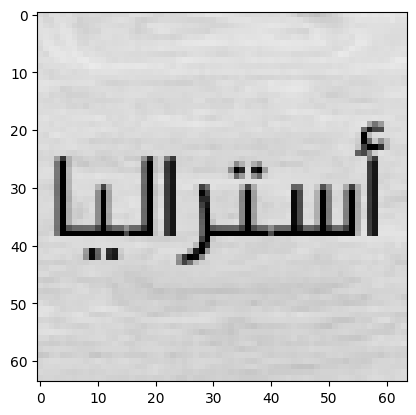

وكيفية
square standard


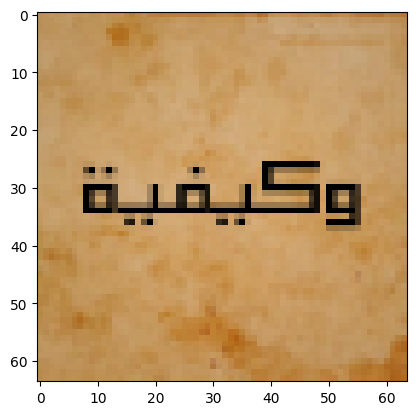

والأندية
square standard


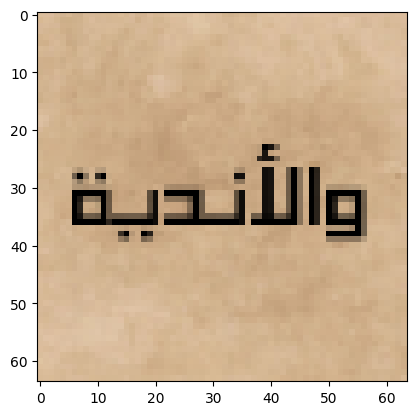

الغارات
kufi curved suqare


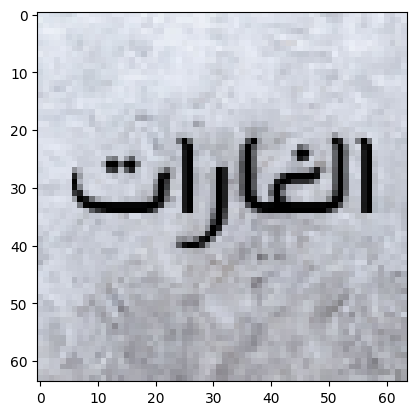

أكدت
farisi standard


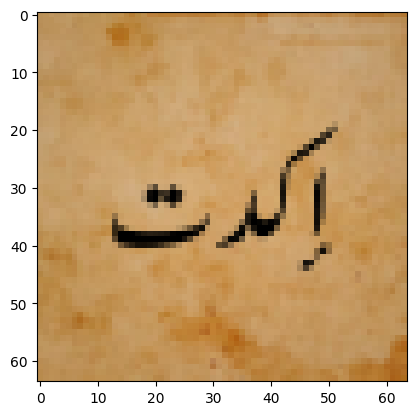

ومهارة
square standard


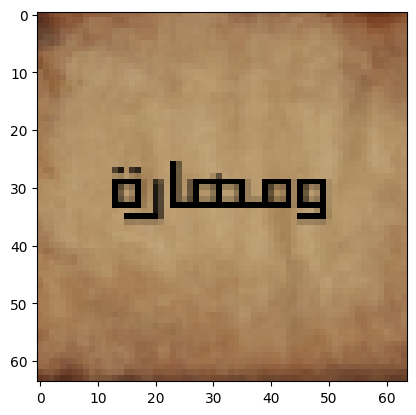

أجمعت
unknown


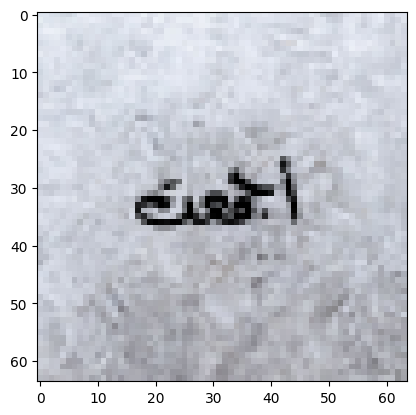

العالم
rukaa standard


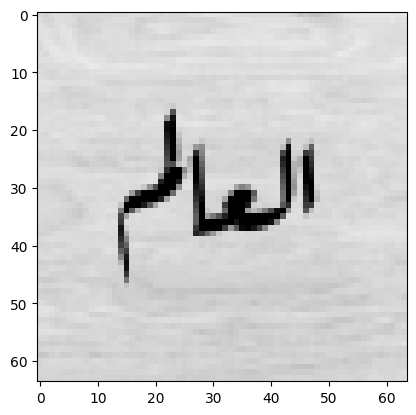

إلى
rukaa standard


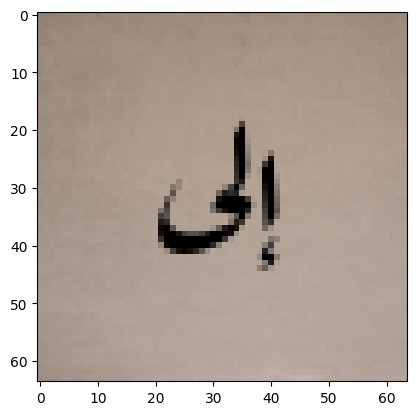

للذين
rukaa standard


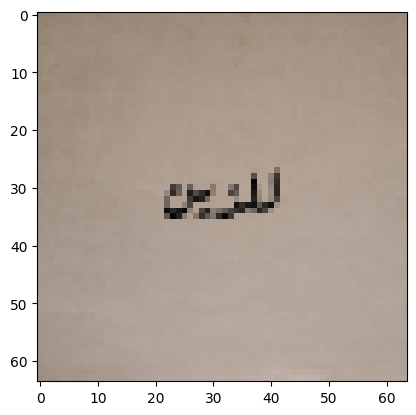

أما
square standard


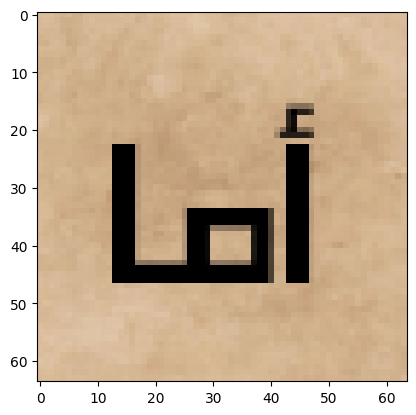

المركزة
free bold


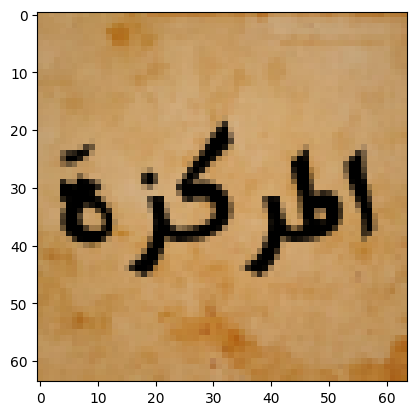

بعدما
diwani diacritized


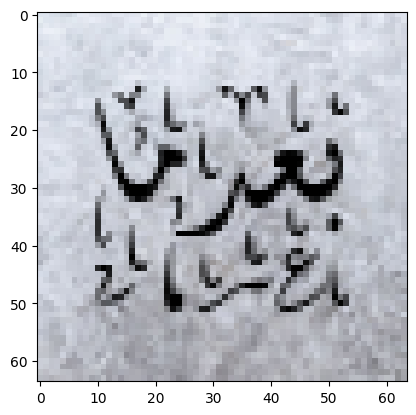

فيك
diwani diacritized


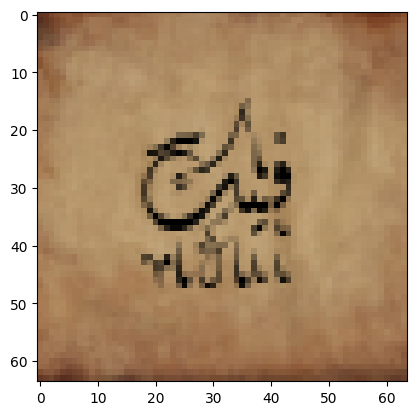

لرواياتها
managa


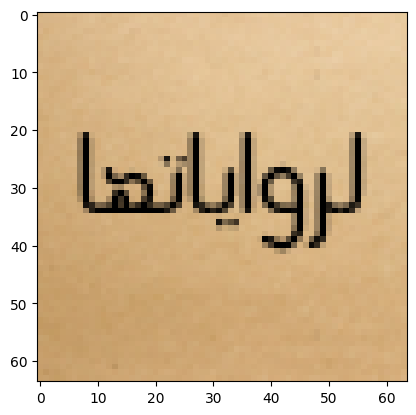

جريزمان
unknown


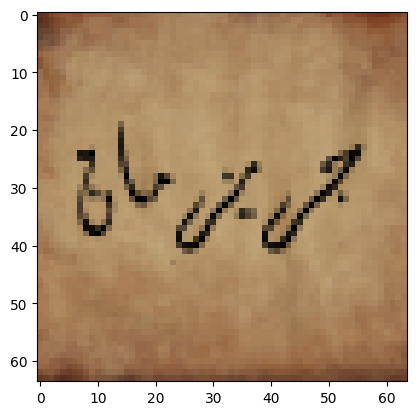

الجدير
kufi standard


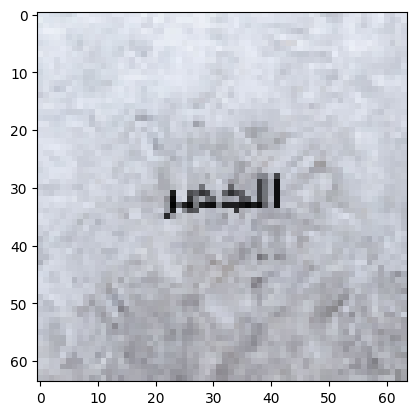

محاولة
aljazeera


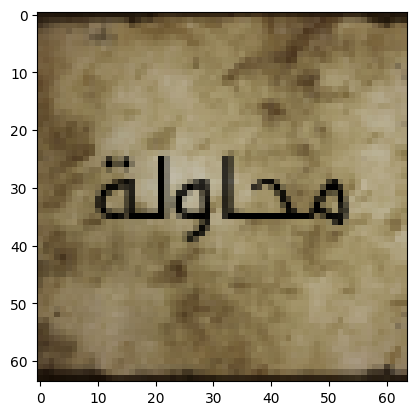

السعودية
mobili


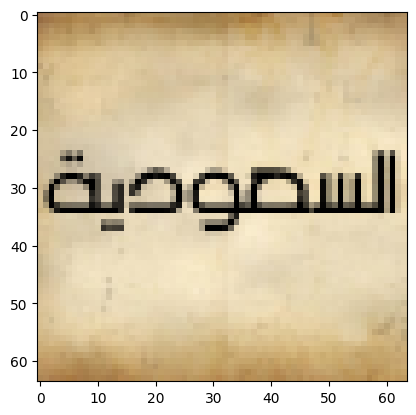

أبنائها
aljazeera


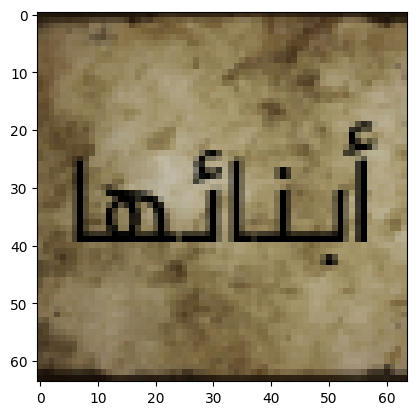

يظلان
unknown


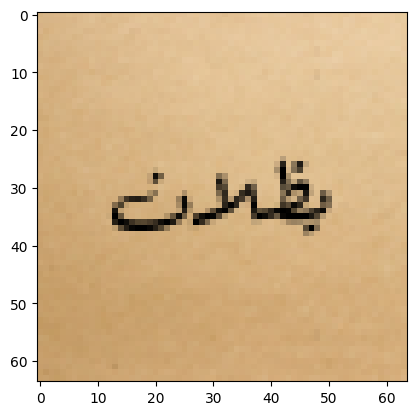

ويمكنه ا
morrocan andulus


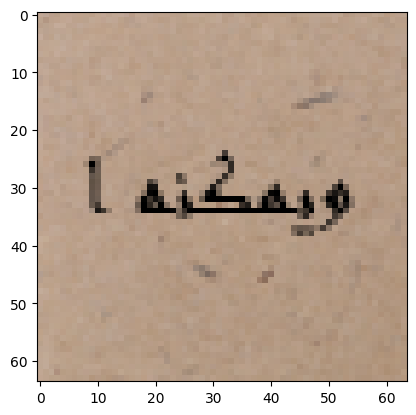

كبير
diwani long


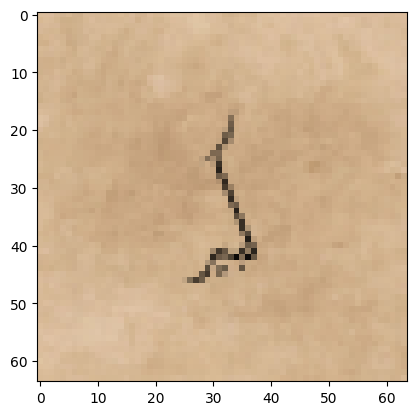

طيبة
diwani diacritized


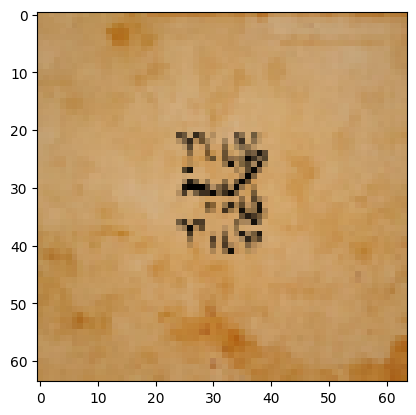

عمره
free bold


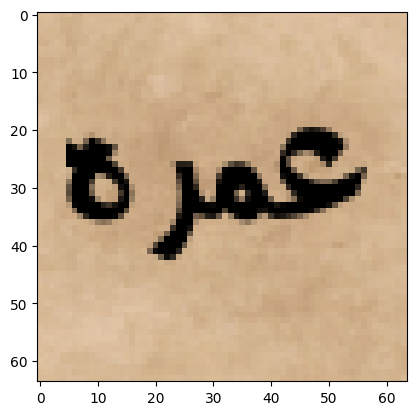

تأخذ
aljazeera


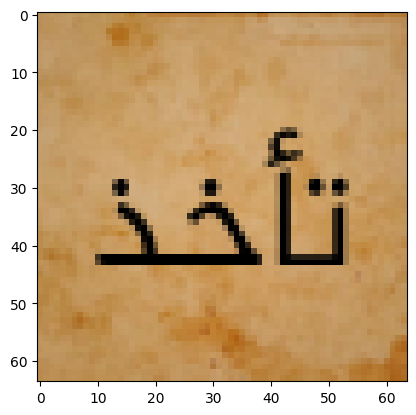

يأخذ
rukaa standard


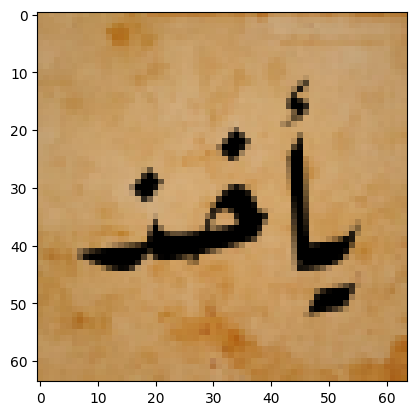

الاستمرارية
kufi standard


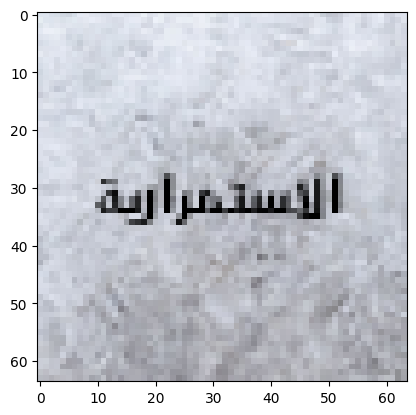

موقفه
mobili


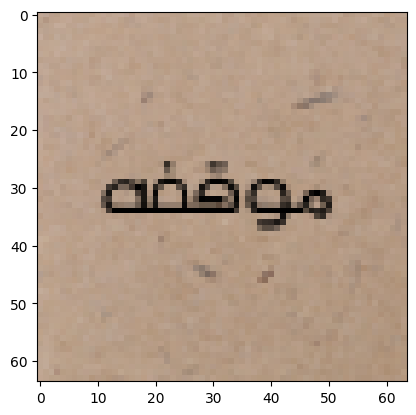

الطلبات
free long


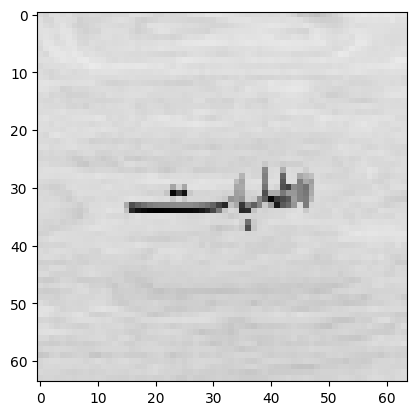

وتلفزيون
rukaa fast


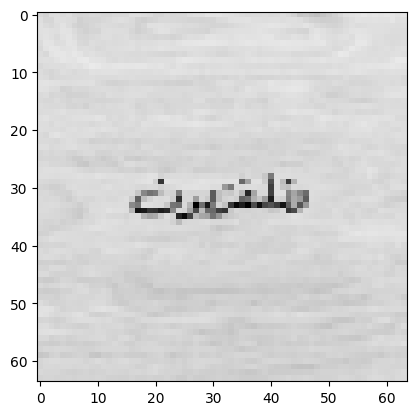

In [10]:
base_path = f"../first_batch"
for i, img_name in enumerate(os.listdir(base_path)):
    key, _ = img_name.split('.')    
    if img_name.endswith(".png"):
        txt = open(f"{base_path}/{img_name[:-4]}.txt", "r").read()
        capt = open(f"{base_path}/{img_name[:-4]}_capt.txt", "r").read()
        print(txt)
        print(capt)
        im = Image.open(f"{base_path}/{img_name}")
        plt.imshow(im)
        plt.show()
        if i > 100:
            break